In [1]:
import struct
from PIL import Image
import struct
from IPython.display import display
import matplotlib.pyplot as plt
import os
import numpy as np

**ENCODE TIFF-IMAGEs**

In [2]:
def read_tiff(file_path):
    image = Image.open(file_path)
    width, height = image.size
    bpp = len(image.getbands()) * 8  

    if bpp not in [1, 8, 24, 32]:
        raise ValueError("This implementation only supports 1-bit, 8-bit (gray tones), 24-bit (RGB) and 32-bit (RGBA) TIFF files.")

    pixel_data = []
    for y in range(height):
        row = []
        for x in range(width):
            pixel = image.getpixel((x, y))
            row.append(pixel)
        pixel_data.append(row)

    return pixel_data, width, height, bpp
def write_rle_compressed(data, width, height, bpp, output_path):
    compressed_data = []
    for row in data:
        count = 1
        previous = row[0]
        for pixel in row[1:]:
            if pixel == previous and count < 255:
                count += 1
            else:
                compressed_data.append((count, previous))
                previous = pixel
                count = 1
        compressed_data.append((count, previous))

    with open(output_path, 'wb') as f:
        f.write(struct.pack('<III', width, height, bpp))
        for count, pixel in compressed_data:
            if bpp == 32:  
                f.write(bytes([count]) + bytes(pixel))
            elif bpp == 24:  # RGB канали
                f.write(bytes([count]) + bytes(pixel))
            elif bpp in [1, 8]: 
                f.write(bytes([count, pixel]))

def tiff_to_rle(input_path, output_path):
    data, width, height, bpp = read_tiff(input_path)
    write_rle_compressed(data, width, height, bpp, output_path)

In [3]:
tiff_to_rle('tiff_sample1.tiff', 'tiff_sample1.rle')
tiff_to_rle('tiff_sample2.tif', 'tiff_sample2.rle')
tiff_to_rle('tiff_sample3.tiff', 'tiff_sample3.rle')

**DECODE TIFF-IMAGEs**

In [4]:
def read_rle(file_path):
    with open(file_path, 'rb') as f:
        width, height, bpp = struct.unpack('<III', f.read(12))
        compressed_data = f.read()

    decompressed_data = []
    i = 0
    while i < len(compressed_data):
        count = compressed_data[i]
        if bpp == 32:
            
            pixel = tuple(compressed_data[i+1:i+5])
            i += 5  
        elif bpp == 24:
            
            pixel = tuple(compressed_data[i+1:i+4])
            i += 4
        elif bpp == 1:
           
            pixel = compressed_data[i+1]
            i += 2
        decompressed_data.extend([pixel] * count)

    return decompressed_data, width, height, bpp

def rle_to_tiff(input_path, output_path):
    data, width, height, bpp = read_rle(input_path)

    if len(data) != width * height:
        raise ValueError("The decompressed data size does not match the expected image dimensions.")


    mode = 'RGBA' if bpp == 32 else 'RGB' if bpp == 24 else '1'
    image = Image.new(mode, (width, height))
    pixels = image.load()

    for y in range(height):
        for x in range(width):
            pixels[x, y] = data[y * width + x]

    image.save(output_path, format='TIFF')


In [5]:
rle_to_tiff('tiff_sample1.rle', 'output1.tiff')
rle_to_tiff('tiff_sample2.rle', 'output2.tiff')
rle_to_tiff('tiff_sample3.rle', 'output3.tiff')

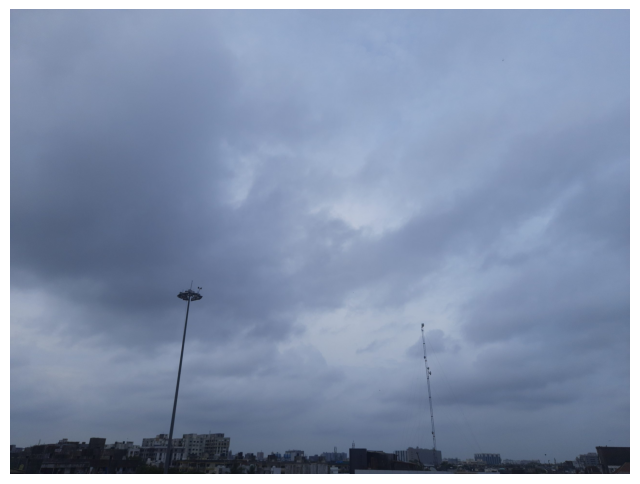

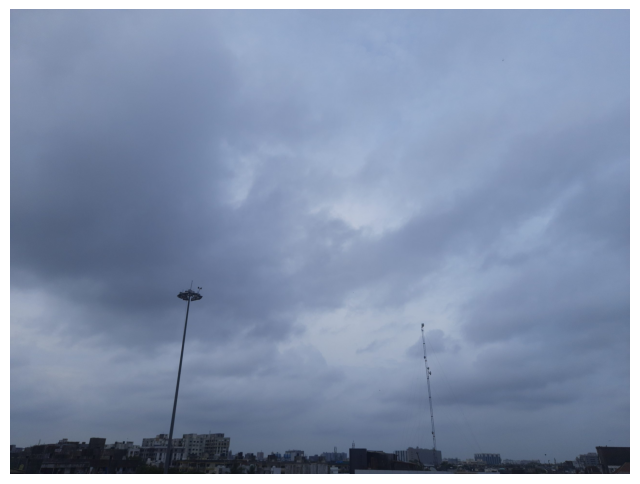

Розмір оригінального файлу :2229.484Кб
Розмір cтиснутого rle файлу:8425.324Кб
Розмір декодованого файлу :19200.15Кб


In [6]:
img1 = Image.open('tiff_sample1.tiff')
img2=Image.open('output1.tiff')
plt.figure(figsize=(8, 8))
plt.axis('off')  
plt.imshow(np.array(img1))
plt.figure(figsize=(8, 8))  
plt.imshow(np.array(img2))
plt.axis('off')  
plt.show()
size_of_original=os.path.getsize('tiff_sample1.tiff')/1024
size_of_rle=os.path.getsize('tiff_sample1.rle')/1024
size_of_output=os.path.getsize('output1.tiff')/1024
print(f"Розмір оригінального файлу :{float('{:.3f}'.format(size_of_original))}Кб")
print(f"Розмір cтиснутого rle файлу:{float('{:.3f}'.format(size_of_rle))}Кб")
print(f"Розмір декодованого файлу :{float('{:.3f}'.format(size_of_output))}Кб")

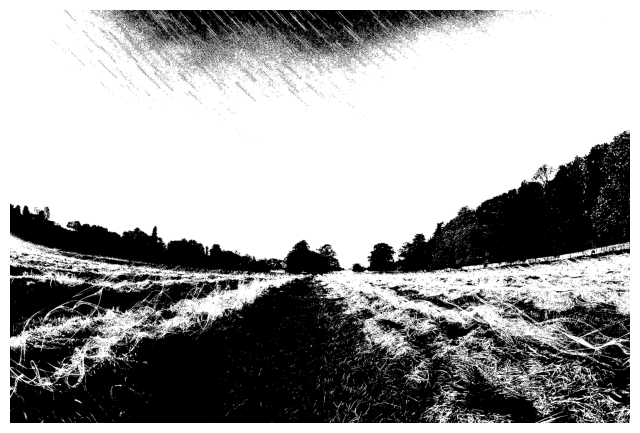

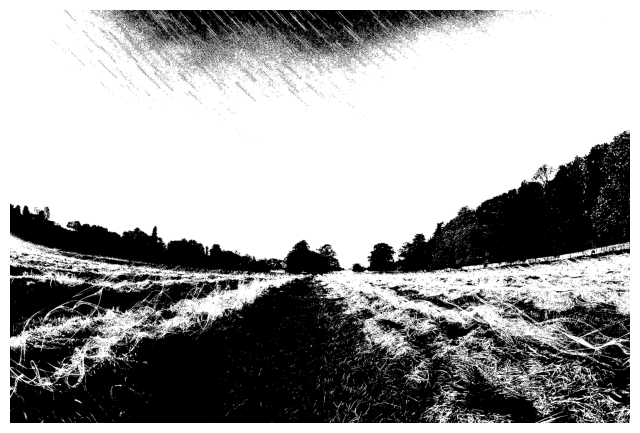

Розмір оригінального файлу:8426.344Кб
Розмір cтиснутого rle файлу:772.281Кб
Розмір декодованого файлу:7200.137Кб


In [7]:
img1 = Image.open('tiff_sample2.tif')
img2=Image.open('output2.tiff')
plt.figure(figsize=(8, 8))
plt.axis('off')  
plt.imshow(np.array(img1))
plt.figure(figsize=(8, 8))  
plt.imshow(np.array(img2))
plt.axis('off')  
plt.show()
size_of_original=os.path.getsize('tiff_sample2.tif')/1024
size_of_rle=os.path.getsize('tiff_sample2.rle')/1024
size_of_output=os.path.getsize('output2.tiff')/1024
print(f"Розмір оригінального файлу:{float('{:.3f}'.format(size_of_original))}Кб")
print(f"Розмір cтиснутого rle файлу:{float('{:.3f}'.format(size_of_rle))}Кб")
print(f"Розмір декодованого файлу:{float('{:.3f}'.format(size_of_output))}Кб")

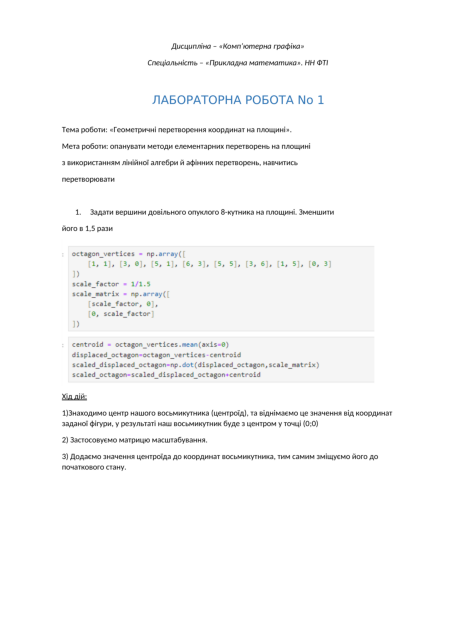

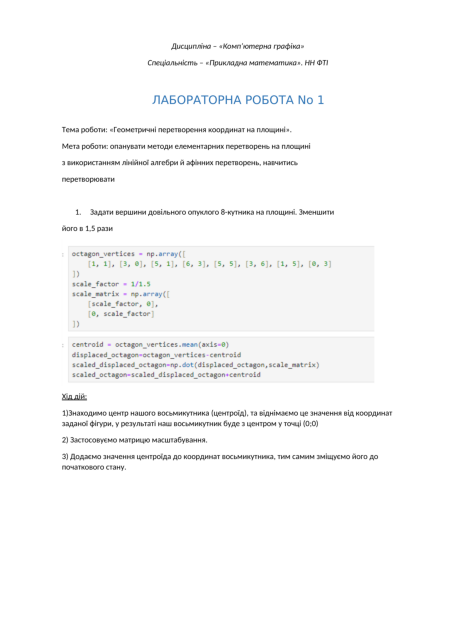

Розмір оригінального файлу:11334.236Кб
Розмір cтиснутого rle файлу:663.758Кб
Розмір декодованого файлу:11334.236Кб


In [8]:
img1 = Image.open('tiff_sample3.tiff')
img2=Image.open('output3.tiff')
plt.figure(figsize=(8, 8))
plt.axis('off')  
plt.imshow(np.array(img1))
plt.figure(figsize=(8, 8))  
plt.imshow(np.array(img2))
plt.axis('off')  
plt.show()
size_of_original=os.path.getsize('tiff_sample3.tiff')/1024
size_of_rle=os.path.getsize('tiff_sample3.rle')/1024
size_of_output=os.path.getsize('output3.tiff')/1024
print(f"Розмір оригінального файлу:{float('{:.3f}'.format(size_of_original))}Кб")
print(f"Розмір cтиснутого rle файлу:{float('{:.3f}'.format(size_of_rle))}Кб")
print(f"Розмір декодованого файлу:{float('{:.3f}'.format(size_of_output))}Кб")

**ENCODE BMP RGB**

In [9]:
def encode_rle(data):
    encoding = []
    i = 0
    while i < len(data):
        count = 1
        while i + 3 < len(data) and data[i:i+3] == data[i+3:i+6]:
            count += 1
            i += 3
        encoding.append((count, data[i:i+3]))
        i += 3
    return encoding

def save_rle(encoded_data, filename, width, height):
    with open(filename, 'wb') as file:
        file.write(struct.pack('I', width))
        file.write(struct.pack('I', height))
        for count, value in encoded_data:
            while count > 65535:
                file.write(struct.pack('H', 65535))
                file.write(value)
                count -= 65535
            file.write(struct.pack('H', count))
            file.write(value)

def compress_bmp_image(input_image_path, output_rle_path):
    image = Image.open(input_image_path)
    if image.mode != 'RGB':
        image = image.convert('RGB')
    width, height = image.size
    data = image.tobytes()

    encoded_data = encode_rle(data)
    save_rle(encoded_data, output_rle_path, width, height)
    print("Compression completed and saved to", output_rle_path)

compress_bmp_image('bmp_sample3.bmp', 'bmp_sample3.rle')


Compression completed and saved to bmp_sample3.rle


**DECODE BMP RGB**

In [10]:
def load_rle(filename):
    with open(filename, 'rb') as file:
        width = struct.unpack('I', file.read(4))[0]
        height = struct.unpack('I', file.read(4))[0]

        encoded_data = []
        while True:
            count_bytes = file.read(2) 
            if not count_bytes:
                break
            count = struct.unpack('H', count_bytes)[0]

            value_bytes = file.read(3)
            if not value_bytes:
                break
            value = struct.unpack('3B', value_bytes)
            encoded_data.append((count, value))
    return encoded_data, width, height

def decode_rle(encoded_data):
    output = []
    for count, value in encoded_data:
        output.extend([value] * count)  
    return bytes([item for sublist in output for item in sublist])  

def save_image(data, width, height, output_image_path):
    image = Image.frombytes('RGB', (width, height), data)
    image.save(output_image_path)
    print(f"Image saved to {output_image_path}")

def decompress_rle(input_rle_path, output_image_path):
    encoded_data, width, height = load_rle(input_rle_path)
    decoded_data = decode_rle(encoded_data)
    save_image(decoded_data, width, height, output_image_path)


decompress_rle('bmp_sample3.rle', 'output3.bmp')

Image saved to output3.bmp


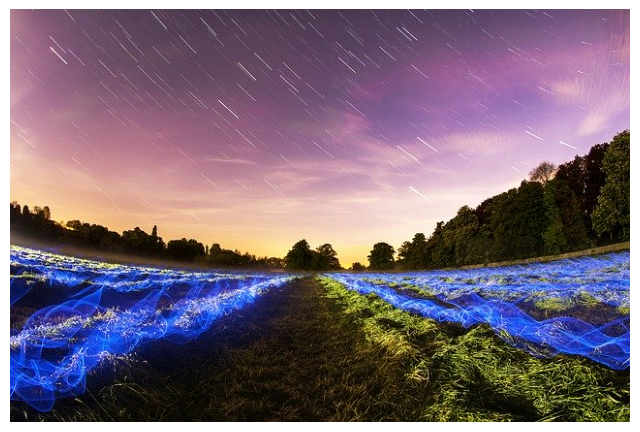

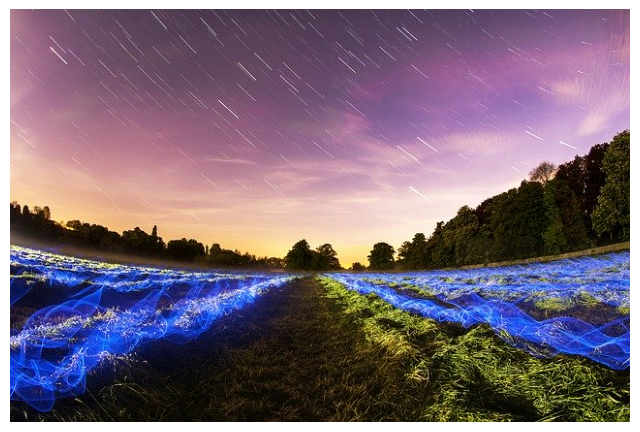

Розмір оригінального файлу:798.885Кб
Розмір cтиснутого rle файлу:1231.185Кб
Розмір декодованого файлу:798.803Кб


In [11]:
img1 = Image.open('bmp_sample3.bmp')
img2=Image.open('output3.bmp')
plt.figure(figsize=(8, 8))
plt.axis('off')  
plt.imshow(np.array(img1))
plt.figure(figsize=(8, 8))  
plt.imshow(np.array(img2))
plt.axis('off')  
plt.show()
size_of_original=os.path.getsize('bmp_sample3.bmp')/1024
size_of_rle=os.path.getsize('bmp_sample3.rle')/1024
size_of_output=os.path.getsize('output3.bmp')/1024
print(f"Розмір оригінального файлу:{float('{:.3f}'.format(size_of_original))}Кб")
print(f"Розмір cтиснутого rle файлу:{float('{:.3f}'.format(size_of_rle))}Кб")
print(f"Розмір декодованого файлу:{float('{:.3f}'.format(size_of_output))}Кб")

ENCODE BMP WB

In [19]:
def encode_rle_WB(data):
    encoding = []
    i = 0
    while i < len(data):
        count = 1
        while i + 1 < len(data) and data[i] == data[i + 1]:
            count += 1
            i += 1
            if count == 65535:  
                break
        encoding.append((count, data[i]))
        i += 1
    return encoding

def save_rle_WB(encoded_data, filename, width, height):
    with open(filename, 'wb') as file:
        file.write(struct.pack('II', width, height))
        file.write(struct.pack('B', 8))

        for count, value in encoded_data:
            file.write(struct.pack('H', count))
            # Записуємо значення пікселя
            file.write(struct.pack('B', value))

def compress_image_WB(input_image_path, output_rle_path):
    image = Image.open(input_image_path).convert('L')  
    width, height = image.size
    data = image.tobytes()
    encoded_data = encode_rle_WB(data)
    save_rle_WB(encoded_data, output_rle_path, width, height)
    print("Compression completed and saved to", output_rle_path)

In [20]:
compress_image_WB('bmp_sample1.bmp', 'bmp_sample1.rle')
compress_image_WB('bmp_sample2.bmp', 'bmp_sample2.rle')

Compression completed and saved to bmp_sample1.rle
Compression completed and saved to bmp_sample2.rle


In [21]:
def load_rle_WB(filename):
    with open(filename, 'rb') as file:
        width = struct.unpack('I', file.read(4))[0]
        height = struct.unpack('I', file.read(4))[0]
        bpp = struct.unpack('B', file.read(1))[0]  # Біт на піксель (8 для сірих)

        encoded_data = []
        while True:
            count_bytes = file.read(2)
            if not count_bytes:
                break
            count = struct.unpack('H', count_bytes)[0]

            value_bytes = file.read(1)
            if not value_bytes:
                break
            value = struct.unpack('B', value_bytes)[0]
            encoded_data.append((count, value))
    return encoded_data, width, height, bpp

def decode_rle_WB(encoded_data):
    output = []
    for count, value in encoded_data:
        output.extend([value] * count)
    return bytes(output)

def save_image_WB(data, width, height, bpp, output_image_path):
    mode = 'L'  
    image = Image.frombytes(mode, (width, height), data)
    image.save(output_image_path)
    print(f"Image saved to {output_image_path}")

def decompress_rle_WB(input_rle_path, output_image_path):
    encoded_data, width, height, bpp = load_rle_WB(input_rle_path)
    decoded_data = decode_rle_WB(encoded_data)
    save_image_WB(decoded_data, width, height, bpp, output_image_path)

In [23]:
decompress_rle_WB('bmp_sample1.rle', 'output1.bmp')
decompress_rle_WB('bmp_sample2.rle', 'output2.bmp')

Image saved to output1.bmp


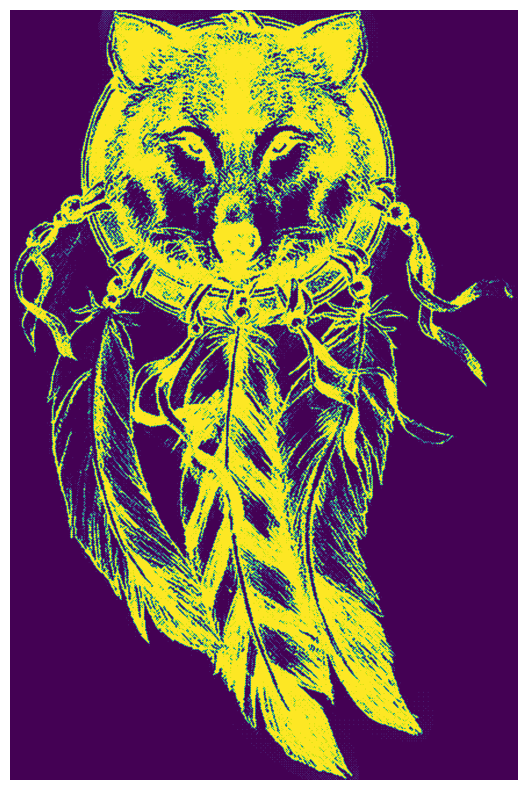

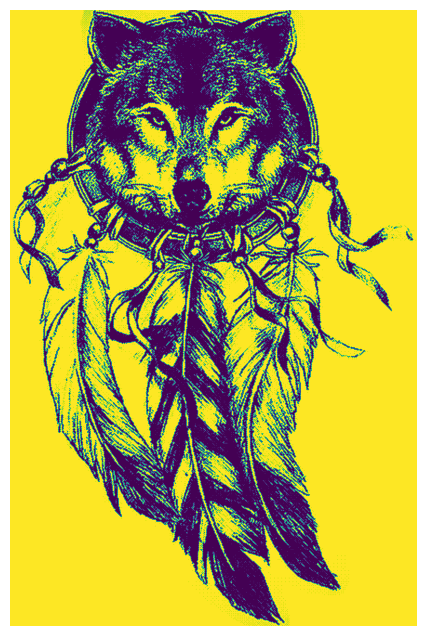

Розмір оригінального файлу:904.264Кб
Розмір cтиснутого rle файлу:564.393Кб
Розмір декодованого файлу:4541.881Кб


In [24]:
img1 = Image.open('bmp_sample1.bmp')
img2=Image.open('output1.bmp')
plt.figure(figsize=(10, 10))
plt.axis('off')  
plt.imshow(np.array(img1))
plt.figure(figsize=(8, 8))  
plt.imshow(np.array(img2))
plt.axis('off')  
plt.show()
size_of_original=os.path.getsize('e1gklqmo.bmp')/1024
size_of_rle=os.path.getsize('bmp_sample1.rle')/1024
size_of_output=os.path.getsize('output1.bmp')/1024
print(f"Розмір оригінального файлу:{float('{:.3f}'.format(size_of_original))}Кб")
print(f"Розмір cтиснутого rle файлу:{float('{:.3f}'.format(size_of_rle))}Кб")
print(f"Розмір декодованого файлу:{float('{:.3f}'.format(size_of_output))}Кб")

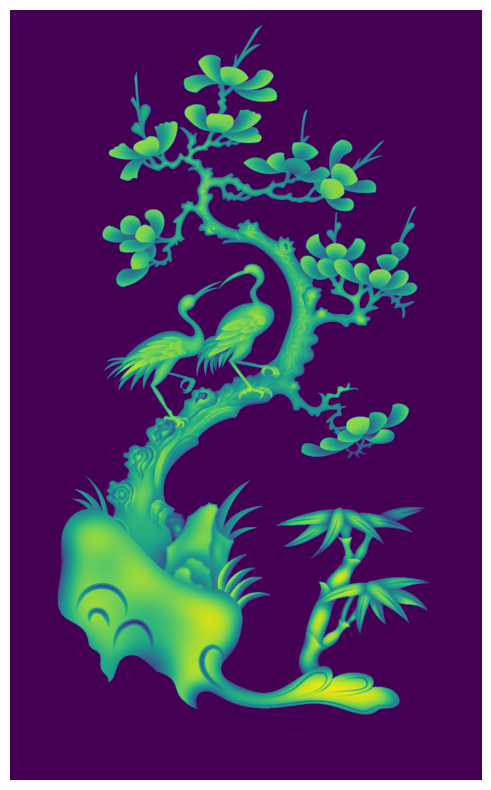

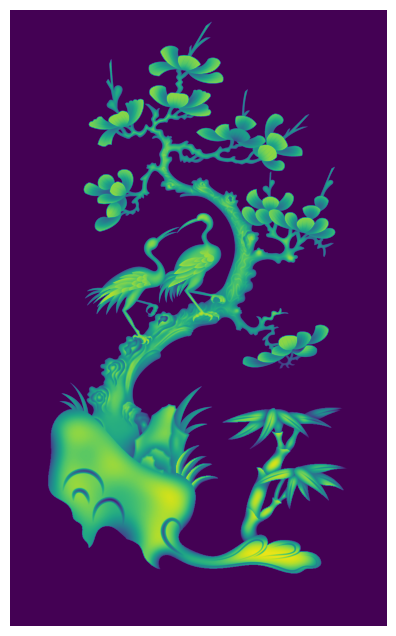

Розмір оригінального файлу:15616.611Кб
Розмір cтиснутого rle файлу:6724.02Кб
Розмір декодованого файлу:15616.615Кб


In [18]:
img1 = Image.open('bmp_sample2.bmp')
img2=Image.open('output2.bmp')
plt.figure(figsize=(10, 10))
plt.axis('off')  
plt.imshow(np.array(img1))
plt.figure(figsize=(8, 8))  
plt.imshow(np.array(img2))
plt.axis('off')  
plt.show()
size_of_original=os.path.getsize('bmp_sample2.bmp')/1024
size_of_rle=os.path.getsize('bmp_sample2.rle')/1024
size_of_output=os.path.getsize('output2.bmp')/1024
print(f"Розмір оригінального файлу:{float('{:.3f}'.format(size_of_original))}Кб")
print(f"Розмір cтиснутого rle файлу:{float('{:.3f}'.format(size_of_rle))}Кб")
print(f"Розмір декодованого файлу:{float('{:.3f}'.format(size_of_output))}Кб")